In [ ]:
# Checking GPU Configuration
!nvidia-smi

Fri Feb 25 04:10:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    33W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# FYP Experiment 1
# Sentence Transformer  for Word-Level BERT Embedding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Installing/Downloading required packages into this notebook
!pip install sentence-transformers

     |████████████████████████████████| 79 kB 5.4 MB/s 
     |████████████████████████████████| 3.8 MB 17.0 MB/s 
     |████████████████████████████████| 1.2 MB 60.2 MB/s 
     |████████████████████████████████| 67 kB 7.3 MB/s 
     |████████████████████████████████| 895 kB 60.3 MB/s 
     |████████████████████████████████| 6.5 MB 78.7 MB/s 
     |████████████████████████████████| 596 kB 59.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=60d73409054ddc489ff083bc38521d2ef0522505a6c4e3a84deb939bd2862883
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
from keras.models import load_model

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# NLTK Word Tokenization without Punctuation

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import nltk
nltk.download("punkt")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# CharCNN Input Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model

In [ ]:
def charCNN_input_preprocess(text):
  '''
  Takes input sentence
  Preprocesses - lowers, character level tokenization & padding
  Returns preprocessed input
  '''
  input_text = np.array([text])
  input_text = [s.lower() for s in input_text]
  tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
  tk.fit_on_texts(input_text)

  alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
  char_dict = {}
  for i, char in enumerate(alphabet):
      char_dict[char] = i + 1

  tk.word_index = char_dict.copy()
  tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

  input_sequence = tk.texts_to_sequences(input_text)
  input_data = pad_sequences(input_sequence, maxlen=1014, padding='post')
  input_data = np.array(input_data, dtype='float32')

  return input_data

In [ ]:
# CharCNN Model Loading
charCNN_model = load_model("/content/drive/MyDrive/Module-1-Preprocessing-Word-Embedding-Formulation/charCNN")

In [ ]:
def create_intelligent_word_embedding(text):
  '''
  Takes an input query text
  Finds BERT Embedding of each word
  Finds charCNN embedding of each word
  Concatenates the above two for each word
  Returns a list of the above word representations
  '''
  charcnn_embedding = []
  bert_embedding = []
  final_embedding = []
  word_list = text.split(" ")

  for i,word in enumerate(word_list):
    bert_embedding.append(model.encode(word))
    #print("1")
    charcnn_embedding.append(np.squeeze(charCNN_model.predict(np.expand_dims(charCNN_input_preprocess(word)[0],axis = 0)),axis=0))

    final_embedding.append(np.concatenate([bert_embedding[i],charcnn_embedding[i]]))

  return final_embedding, bert_embedding, charcnn_embedding

In [ ]:
train_df.head()

,sentences,dac,intents,slots,bert_embeddings,charcnn_embeddings,intelligent_concatenated_word_representation
0,Ok lets go with that Mexico City package,no-result,package,O O O O O B-city_name I-city_name B-trip_inclu...,"[0.21825218200683594, 0.1797117441892624, 0.09...","[0.75992, 0.0, 1.2215365, 0.0, 0.47303614, 0.0...","[0.21825218200683594, 0.1797117441892624, 0.09..."
1,I have several options for you,inform,other,O O O B-option O O,"[0.25836503505706787, -0.19256573915481567, 0....","[1.0406556, 0.0, 1.2923125, 0.0, 0.6814615, 0....","[0.25836503505706787, -0.19256573915481567, 0...."
2,2 of us,inform,provide_info,B-passenger_number O O,"[0.5996378064155579, -0.19174881279468536, 0.2...","[0.9620005, 0.0, 1.2165517, 0.0, 0.7001203, 0....","[0.5996378064155579, -0.19174881279468536, 0.2..."
3,I am very sorry but there are no other options...,canthelp,availability_info,O O O B-apology O O O O O B-option O O O O O O O,"[0.03301243856549263, 0.22434571385383606, 0.4...","[0.0, 0.0, 5.7392097, 0.0, 0.0, 0.0, 4.924532,...","[0.03301243856549263, 0.22434571385383606, 0.4..."
4,Hi there my team and I are thinking of going t...,inform,provide_info,O O O O O O O O O O O B-to_loc.city_name O,"[0.14393003284931183, -0.19269590079784393, 0....","[0.2955559, 0.0, 1.5428573, 0.0, 0.31917298, 0...","[0.14393003284931183, -0.19269590079784393, 0...."


In [ ]:
train_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_train.pkl")
valid_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_valid.pkl")
test_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_test.pkl")

In [ ]:
test_df

,sentences,dac,intents,slots,bert_embeddings,charcnn_embeddings,padded_sentences,intelligent_concatenated_representation
0,What is the hotel located near,request,amenity,O O O O O B-distance_relative,"[[-0.23178351, 0.17259878, -0.12882285, -0.439...","[[0.9620004, 0.0, 1.2165515, 0.0, 0.7001202, 0...",What is the hotel located near <UNK> <UNK> <UN...,"[[-0.23178351, 0.17259878, -0.12882285, -0.439..."
1,Hello,greeting,greet,O,"[[-0.27203566, 0.48024607, 0.522958, 0.0253584...","[[0.9620004, 0.0, 1.2165515, 0.0, 0.7001202, 0...",Hello <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK...,"[[-0.27203566, 0.48024607, 0.522958, 0.0253584..."
2,yes please,request,provide_info,O O,"[[0.41083184, -0.046039432, 0.30918816, -0.083...","[[0.9620004, 0.0, 1.2165515, 0.0, 0.7001202, 0...",yes please <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>...,"[[0.41083184, -0.046039432, 0.30918816, -0.083..."
3,Would you like to book here instead,confirm,book,O O O O B-book O O,"[[-0.1546611, 0.54921955, 0.5287122, -0.705472...","[[0.9620004, 0.0, 1.2165515, 0.0, 0.7001202, 0...",Would you like to book here instead <UNK> <UNK...,"[[-0.1546611, 0.54921955, 0.5287122, -0.705472..."
4,The best I can do is offer you a 7 day package...,offer,budget_info,O O O O O O O O O B-trip_duration I-trip_durat...,"[[-0.3157511, 0.78676254, -0.11106903, 0.06540...","[[0.9620004, 0.0, 1.2165515, 0.0, 0.7001202, 0...",a 7 day package in Ulsan at the Grandiose Will...,"[[-0.3157511, 0.78676254, -0.11106903, 0.06540..."
...,...,...,...,...,...,...,...,...
5316,Is there a certain date you would like to leav...,request,date,O O O O O O O O O O O,"[[0.14892311, -0.049836505, -0.24250565, -0.31...","[[0.9620004, 0.0, 1.2165515, 0.0, 0.7001202, 0...",Is there a certain date you would like to leav...,"[[0.14892311, -0.049836505, -0.24250565, -0.31..."
5317,When would you like to travel,affirm,date,O O O O O O,"[[0.08541169, 0.17415698, 0.15558964, -0.41091...","[[0.9620004, 0.0, 1.2165515, 0.0, 0.7001202, 0...",When would you like to travel <UNK> <UNK> <UNK...,"[[0.08541169, 0.17415698, 0.15558964, -0.41091..."
5318,Yes it is,affirm,other,O O O,"[[0.41083184, -0.046039432, 0.30918816, -0.083...","[[0.9620004, 0.0, 1.2165515, 0.0, 0.7001202, 0...",Yes it is <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> ...,"[[0.41083184, -0.046039432, 0.30918816, -0.083..."
5319,Where will you be leaving from,inform,departure,O O O O O O,"[[0.7114567, -0.103527784, -0.01365647, 0.0679...","[[0.9620004, 0.0, 1.2165515, 0.0, 0.7001202, 0...",Where will you be leaving from <UNK> <UNK> <UN...,"[[0.7114567, -0.103527784, -0.01365647, 0.0679..."


In [ ]:
# Sample Embedding
index = int(input("Enter index: "))
print("Input Query: " + train_df.iloc[index, 0])
print("BERT Embedding Shape: " , np.array(train_df.iloc[index, 4]).shape)
print("CharCNN Embedding Shape: ", np.array(train_df.iloc[index, 5]).shape)
print("Intelligent Concatenated Word Representation Shape: ", np.array(train_df.iloc[index, 7]).shape)

Enter index: 5
Input Query: Ok Where do you want to go
BERT Embedding Shape:  (24, 384)
CharCNN Embedding Shape:  (24, 100)
Intelligent Concatenated Word Representation Shape:  (24, 484)


In [ ]:
print("\nIntelligent Concatenated Word Representation: ", train_df.iloc[index, 7])


Intelligent Concatenated Word Representation:  [array([ 4.27074462e-01,  1.86667517e-02,  3.33708376e-01, -3.80371022e-03,
       -1.12843020e-02, -4.28314477e-01,  9.30685580e-01, -8.04536045e-02,
       -3.30409557e-01,  1.76277280e-01,  2.64784455e-01, -6.26055002e-01,
        1.10752843e-01, -7.52949476e-01,  4.32199724e-02, -2.14678291e-02,
       -5.08832224e-02, -5.12881219e-01, -1.36370659e+00, -3.10194254e-01,
       -2.48962715e-01, -2.16600653e-02,  4.90234375e-01, -1.10351436e-01,
       -3.45362335e-01,  5.27349412e-01,  8.16381127e-02,  6.76043987e-01,
        5.37108183e-01, -3.72566772e-03, -1.72633350e-01, -3.58601362e-01,
        1.56027138e-01, -4.99081612e-02,  8.64179954e-02, -1.37539521e-01,
        6.40410110e-02, -1.41929731e-01, -1.16481163e-01, -4.72395688e-01,
        1.20628446e-01, -4.63136703e-01, -4.43637967e-02, -4.12771702e-01,
       -5.67082055e-02,  1.30772635e-01, -7.01530203e-02, -1.62929699e-01,
        5.42938411e-01, -1.24178499e-01,  4.5736745

In [ ]:
print("\nBERT Embedding: ", train_df.iloc[index, 4])


BERT Embedding:  [array([ 4.27074462e-01,  1.86667517e-02,  3.33708376e-01, -3.80371022e-03,
       -1.12843020e-02, -4.28314477e-01,  9.30685580e-01, -8.04536045e-02,
       -3.30409557e-01,  1.76277280e-01,  2.64784455e-01, -6.26055002e-01,
        1.10752843e-01, -7.52949476e-01,  4.32199724e-02, -2.14678291e-02,
       -5.08832224e-02, -5.12881219e-01, -1.36370659e+00, -3.10194254e-01,
       -2.48962715e-01, -2.16600653e-02,  4.90234375e-01, -1.10351436e-01,
       -3.45362335e-01,  5.27349412e-01,  8.16381127e-02,  6.76043987e-01,
        5.37108183e-01, -3.72566772e-03, -1.72633350e-01, -3.58601362e-01,
        1.56027138e-01, -4.99081612e-02,  8.64179954e-02, -1.37539521e-01,
        6.40410110e-02, -1.41929731e-01, -1.16481163e-01, -4.72395688e-01,
        1.20628446e-01, -4.63136703e-01, -4.43637967e-02, -4.12771702e-01,
       -5.67082055e-02,  1.30772635e-01, -7.01530203e-02, -1.62929699e-01,
        5.42938411e-01, -1.24178499e-01,  4.57367450e-01,  2.18938198e-02,
      

In [ ]:
print("\nCharCNN Embedding: ", train_df.iloc[index, 5])


CharCNN Embedding:  [array([0.9620004 , 0.        , 1.2165515 , 0.        , 0.7001202 ,
       0.        , 1.4220388 , 0.05982122, 0.79841614, 1.517122  ,
       0.        , 0.36067742, 0.        , 0.8321941 , 1.2603669 ,
       0.        , 0.        , 0.54629326, 0.9680842 , 1.3488802 ,
       0.        , 0.35696313, 0.542168  , 1.2221024 , 0.26828927,
       0.96800196, 0.44237804, 0.24675098, 1.20941   , 1.3402786 ,
       0.88462853, 0.47121418, 0.68158484, 0.        , 0.        ,
       0.7066314 , 1.4395748 , 0.13860816, 0.3291201 , 0.        ,
       0.        , 0.        , 1.0211809 , 0.830832  , 0.        ,
       0.6624733 , 0.        , 0.        , 0.08371678, 0.09087044,
       0.        , 1.2155467 , 0.74736875, 0.66245097, 0.33974043,
       1.0285767 , 0.12979272, 0.18740198, 0.27342975, 0.99586844,
       0.59755933, 0.        , 0.11815177, 0.9534593 , 0.        ,
       0.5227615 , 0.        , 0.52483726, 1.1741782 , 0.6523852 ,
       1.064513  , 1.0615203 , 0.       

In [ ]:
# train_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordlevelRepresentation/FRAMES/frames_train.pkl")
# valid_df = pd.read_pickle("/content/drive/MyDrive/Datasets/SentenceLevelRepresentation/FRAMES/frames_valid.pkl")
# test_df = pd.read_pickle("/content/drive/MyDrive/Datasets/SentenceLevelRepresentation/FRAMES/frames_test.pkl")

In [ ]:
# Overall dataframe to gauge the max world length of each sentence
df = pd.concat([train_df, valid_df, test_df], axis=0,ignore_index=True)

In [ ]:
def find_max_words(query_col) :
  return max(query_col.str.split().apply(len))

find_max_words(df["sentences"])

78

In [ ]:
query_col = []
a=[query_col.append(text.split(" ")) for text in df["sentences"]]

In [ ]:
len(query_col)

26605

In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(sequences=query_col, maxlen=24, dtype=object, padding='post', value="<UNK>")
res = [' '.join(ele) for ele in padded]

In [ ]:
df["padded_sentences"] = res

# Splitting back to train and validation sets
train_df = df[:19155]
valid_df = df[19155:21284].reset_index(drop=True)
test_df = df[21284:].reset_index(drop=True)

In [ ]:
train_df.columns

Index(['sentences', 'dac', 'intents', 'slots', 'bert_embeddings',
       'charcnn_embeddings', 'padded_sentences',
       'intelligent_concatenated_representation'],
      dtype='object')

In [ ]:
train_df["intelligent_concatenated_representation"] = ""
train_df.drop("intelligent_concatenated_word_representation",axis = 1, inplace=True)

In [ ]:
train_df.head()

In [ ]:
# series = train_df["padded_sentences"][:5001].progress_apply(create_intelligent_word_embedding)
# train_df["intelligent_concatenated_representation"][:5001] = pd.DataFrame(series.tolist())[0].tolist()
# train_df["bert_embeddings"][:5001] = pd.DataFrame(series.tolist())[1].tolist()
# train_df["charcnn_embeddings"][:5001] = pd.DataFrame(series.tolist())[2].tolist()
# train_df.to_pickle("/content/drive/MyDrive/Datasets/WordlevelRepresentation/FRAMES/frames_train.pkl")

In [ ]:
# train_df["intelligent_concatenated_representation"] = ""
# train_df.drop("intelligent_concatenated_word_representation",axis = 1, inplace=True)
# series = train_df["padded_sentences"].progress_apply(create_intelligent_word_embedding)
# train_df["intelligent_concatenated_representation"] = pd.DataFrame(series.tolist())[0].tolist()
# train_df["bert_embeddings"] = pd.DataFrame(series.tolist())[1].tolist()
# train_df["charcnn_embeddings"] = pd.DataFrame(series.tolist())[2].tolist()
# train_df.to_pickle("/content/drive/MyDrive/Datasets/WordlevelRepresentation/FRAMES/frames_train.pkl")

In [ ]:
valid_df["intelligent_concatenated_representation"] = ""
valid_df.drop("intelligent_concatenated_word_representation",axis = 1, inplace=True)
series = valid_df["padded_sentences"].progress_apply(create_intelligent_word_embedding)
valid_df["intelligent_concatenated_representation"] = pd.DataFrame(series.tolist())[0].tolist()
valid_df["bert_embeddings"] = pd.DataFrame(series.tolist())[1].tolist()
valid_df["charcnn_embeddings"] = pd.DataFrame(series.tolist())[2].tolist()
valid_df.to_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_valid.pkl")

100%|██████████| 2129/2129 [52:42<00:00,  1.49s/it]


In [ ]:
#valid_df = valid_df[['sentences','padded_sentences', 'dac', 'intents', 'slots']]
test_df["intelligent_concatenated_representation"] = ""
test_df.drop("intelligent_concatenated_word_representation",axis = 1, inplace=True)
series = test_df["padded_sentences"].progress_apply(create_intelligent_word_embedding)
test_df["intelligent_concatenated_representation"] = pd.DataFrame(series.tolist())[0].tolist()
test_df["bert_embeddings"] = pd.DataFrame(series.tolist())[1].tolist()
test_df["charcnn_embeddings"] = pd.DataFrame(series.tolist())[2].tolist()
test_df.to_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_test.pkl")

100%|██████████| 5321/5321 [2:12:01<00:00,  1.49s/it]


In [ ]:
test_df.head()

# Dialogue Act Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
train_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_train.pkl")
valid_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_valid.pkl")
test_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_test.pkl')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df = pd.concat([train_df,valid_df,test_df],axis = 0)
label_encoder.fit(df["dac"])
train_df['label_encoded_dac'] = label_encoder.transform(train_df['dac'])
valid_df['label_encoded_dac'] = label_encoder.transform(valid_df['dac'])
test_df['label_encoded_dac'] = label_encoder.transform(test_df['dac'])

dataset_train_classes = train_df['label_encoded_dac'].values
dataset_train_class_list = [x for x in dataset_train_classes]

dataset_valid_classes = valid_df['label_encoded_dac'].values
dataset_valid_class_list = [x for x in dataset_valid_classes]

dataset_test_classes = test_df['label_encoded_dac'].values
dataset_test_class_list = [x for x in dataset_test_classes]

from tensorflow.keras.utils import to_categorical
dataset_train_classes = to_categorical(dataset_train_class_list, num_classes = 10) #, num_classes = 27)
dataset_valid_classes = to_categorical(dataset_valid_class_list, num_classes = 10)
dataset_test_classes = to_categorical(dataset_test_class_list, num_classes = 10) #, num_classes = 27)

In [ ]:
import numpy as np
y_train = dataset_train_classes
y_valid = dataset_valid_classes
y_test = dataset_test_classes

In [ ]:
import numpy as np

def applyall(i):
    return np.asarray(i)

X_train = train_df['intelligent_concatenated_representation']
X_train = X_train.values
X_train = applyall(X_train)
X_train = np.stack(X_train)
print(X_train.shape)

X_valid = valid_df['intelligent_concatenated_representation']
X_valid = X_valid.values
X_valid = applyall(X_valid)
X_valid = np.stack(X_valid)
print(X_valid.shape)

X_test = test_df['intelligent_concatenated_representation']
X_test = X_test.values
X_test = applyall(X_test)
X_test = np.stack(X_test)
print(X_test.shape)

(19155, 24, 484)
(2129, 24, 484)
(5321, 24, 484)


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(19155, 24, 484)
(2129, 24, 484)
(5321, 24, 484)
(19155, 31)
(2129, 31)
(5321, 31)


In [ ]:
!pip install keras-self-attention

In [ ]:
import wandb
run = wandb.init(reinit=True)
wandb.init(project="AutomaticInquirySystem", entity="fyp-ais-2022")

accuracy,▁▅▅▆▆▆▆▇██▁▄▅▅▆▆▆▇▇▇██▁▄▅▆▆▆▆▇▇▇▄▅▅▆▆▆▆▇
epoch,▁▂▂▃▃▄▅▅▆▇▁▂▂▃▃▄▅▆▆▇▇█▁▂▃▃▄▅▅▆▆▇▂▂▃▃▄▅▅▆
loss,▆▄▃▃▂▂▂▂▁▁█▄▄▃▃▃▃▂▂▂▂▂█▄▃▃▃▃▃▂▂▂▄▄▃▃▃▃▃▂
val_accuracy,▃▆▆▇▇▇▇▇▇▇▂▅▆▇▇▇▇█▇▇▇█▁▄▇▆▇▇▇▇▇▇▅▅▆▇▆▇▇▇
val_loss,▅▂▂▁▁▁▁▂▂▃█▄▄▃▃▃▃▃▃▄▅▄█▅▃▃▃▃▃▃▄▄▅▄▃▃▃▃▃▃
accuracy,0.71459
epoch,9
loss,1.03328
val_accuracy,0.61437
val_loss,1.41359


In [ ]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten, GlobalAveragePooling1D, Dropout, GRU, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import nltk
import re
from nltk.corpus import stopwords
from textblob import Word, TextBlob

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
import keras
from keras_self_attention import SeqSelfAttention

BATCH_SIZE = 128
EPOCHS = 25
EMBEDDING_DIM = 484
NUM_UNITS = 128
MAX_SEQ_LEN = 24
FINAL_LAYER_UNITS = 10


model = Sequential()
model.add(Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM), dtype='float64'))
model.add(Bidirectional( keras.layers.LSTM( units=128, return_sequences=True)))
model.add(Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))

#89.35 % val - Multiplicative accuracy
model.add(SeqSelfAttention(
    attention_width=15,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-6),
    use_attention_bias=False,
    name='Attention',
))

model.add(Flatten())
model.add(keras.layers.Dense(units=FINAL_LAYER_UNITS, activation='softmax',name='Dialogue-Act-Classification'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 24, 256)          627712    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 Attention (SeqSelfAttention  (None, 24, 256)          65536     
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6144)              0

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                 patience=5, 
                                                 restore_best_weights=True)

In [ ]:
from wandb.keras import WandbCallback

callback = WandbCallback(
    monitor="val_loss", verbose=1, mode="min", save_weights_only=(False),
    log_weights=(False), log_gradients=(False), save_model=(True),
    training_data=(X_train, y_train), validation_data=(X_valid, y_valid), labels=list(label_encoder.inverse_transform(range(3))), predictions=36,
    generator=None, input_type=None, output_type=None, log_evaluation=(False),
    validation_steps=None, class_colors=None, log_batch_frequency=None,
    log_best_prefix="best_", save_graph=(True), validation_indexes=None,
    validation_row_processor=None, prediction_row_processor=None,
    infer_missing_processors=(True), log_evaluation_frequency=0,
)

In [ ]:
#Fit the model on training data
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data=(X_valid, y_valid))#, callbacks=[callback,early_stopper])

Epoch 1/25
150/150 [==============================] - 36s 92ms/step - loss: 1.7171 - accuracy: 0.4548 - val_loss: 1.6280 - val_accuracy: 0.4669
Epoch 2/25
150/150 [==============================] - 10s 64ms/step - loss: 1.5603 - accuracy: 0.4775 - val_loss: 1.5860 - val_accuracy: 0.4692
Epoch 3/25
150/150 [==============================] - 9s 61ms/step - loss: 1.5007 - accuracy: 0.4863 - val_loss: 1.5398 - val_accuracy: 0.4777
Epoch 4/25
150/150 [==============================] - 9s 61ms/step - loss: 1.4598 - accuracy: 0.4929 - val_loss: 1.5296 - val_accuracy: 0.4763
Epoch 5/25
150/150 [==============================] - 9s 61ms/step - loss: 1.4175 - accuracy: 0.5011 - val_loss: 1.5136 - val_accuracy: 0.4876
Epoch 6/25
150/150 [==============================] - 9s 61ms/step - loss: 1.3792 - accuracy: 0.5138 - val_loss: 1.4944 - val_accuracy: 0.4871
Epoch 7/25
150/150 [==============================] - 9s 62ms/step - loss: 1.3399 - accuracy: 0.5233 - val_loss: 1.5229 - val_accuracy: 0.47

In [ ]:
# run = wandb.init(reinit=True)

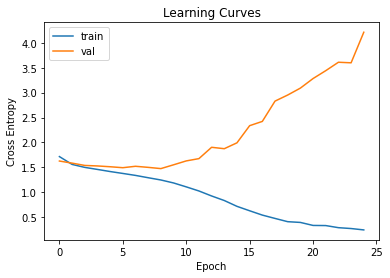

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
#Evaluate the model performance on test data
model_score = model.evaluate(X_test, np.array(y_test), batch_size = BATCH_SIZE)

42/42 [==============================] - 1s 12ms/step - loss: 3.8510 - accuracy: 0.4262


In [ ]:
import random
#Predict the dialogue acts
for i in random.sample(range(1, 498), 5):
    #print(i)
    prediction = (model.predict(np.expand_dims(X_test[i],axis=0)) > 0.5).astype("int32")
    print("Input Query  "+test_df["sentences"][i])
    print("Expected DAC:  "+test_df["dac"][i])
    print("Predicted DAC: "+label_encoder.inverse_transform([np.argmax(prediction, axis=None, out=None)]))
    print('*'*75)

Input Query  Lunar Island Resort is a 3 star hotel putting you near museum and shopping
Expected DAC:  inform
['Predicted DAC: inform']
***************************************************************************
Input Query  Sure That hotel has a 6.77/10 user rating is near a cathedral and provides free breakfast and wifi
Expected DAC:  switch-frame
['Predicted DAC: switch-frame']
***************************************************************************
Input Query  No sorry but you can afford a trip to Denver from Burlington
Expected DAC:  suggest
['Predicted DAC: affirm']
***************************************************************************
Input Query  Hi there do you have any flights out of Tofino
Expected DAC:  greeting
['Predicted DAC: negate']
***************************************************************************
Input Query  You can help me by finding me a vacation from Munich to San Juan between August 27 and September 3
Expected DAC:  inform
['Predicted DAC: info

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
y_test = [np.argmax(y, axis=None, out=None) for y in y_test]
predictions = [np.argmax(y, axis=None, out=None) for y in predictions]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

print('Confusion Matrix')
cm = confusion_matrix(y_test, predictions)
print(sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt="d"))
print(classification_report(y_test, predictions, digits=5))

# Intents

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
train_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/final_frames_train.pkl")
valid_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/final_frames_valid.pkl")
test_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/final_frames_test.pkl')

In [ ]:
train_df["intents"].nunique()

23

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df = pd.concat([train_df,valid_df,test_df],axis = 0)
label_encoder.fit(df["intents"])

train_df['label_encoded_intents'] = label_encoder.transform(train_df['intents'])
valid_df['label_encoded_intents'] = label_encoder.transform(valid_df['intents'])
test_df['label_encoded_intents'] = label_encoder.transform(test_df['intents'])

dataset_train_classes = train_df['label_encoded_intents'].values
dataset_train_class_list = [x for x in dataset_train_classes]

dataset_valid_classes = valid_df['label_encoded_intents'].values
dataset_valid_class_list = [x for x in dataset_valid_classes]

dataset_test_classes = test_df['label_encoded_intents'].values
dataset_test_class_list = [x for x in dataset_test_classes]

from tensorflow.keras.utils import to_categorical
dataset_train_classes = to_categorical(dataset_train_class_list, num_classes = 23) #, num_classes = 27)
dataset_valid_classes = to_categorical(dataset_valid_class_list, num_classes = 23)
dataset_test_classes = to_categorical(dataset_test_class_list, num_classes = 23) #, num_classes = 27)

In [ ]:
import numpy as np
y_train = dataset_train_classes
y_valid = dataset_valid_classes
y_test = dataset_test_classes

In [ ]:
import numpy as np

def applyall(i):
    return np.asarray(i)

X_train = train_df['intelligent_concatenated_representation']
X_train = X_train.values
X_train = applyall(X_train)
X_train = np.stack(X_train)
print(X_train.shape)

X_valid = valid_df['intelligent_concatenated_representation']
X_valid = X_valid.values
X_valid = applyall(X_valid)
X_valid = np.stack(X_valid)
print(X_valid.shape)

X_test = test_df['intelligent_concatenated_representation']
X_test = X_test.values
X_test = applyall(X_test)
X_test = np.stack(X_test)
print(X_test.shape)

(18679, 24, 484)
(2071, 24, 484)
(5186, 24, 484)


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(19155, 24, 484)
(2129, 24, 484)
(5321, 24, 484)
(19155, 211)
(2129, 211)
(5321, 211)


In [ ]:
!pip install keras-self-attention

In [ ]:
import wandb

wandb.init(project="AutomaticInquirySystem", entity="fyp-ais-2022")

In [ ]:
run = wandb.init(reinit=True)

In [ ]:
import pandas as pd 
import numpy as np 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten, GlobalAveragePooling1D, Dropout, GRU, Input

import nltk
import re
from textblob import Word, TextBlob

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
import keras
from keras_self_attention import SeqSelfAttention

BATCH_SIZE = 128
EPOCHS = 25
EMBEDDING_DIM = 484
NUM_UNITS = 128
MAX_SEQ_LEN = 24
FINAL_LAYER_UNITS = 23


model = Sequential()
model.add(Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM), dtype='float64'))
model.add(Bidirectional( keras.layers.LSTM( units=128, return_sequences=True)))
model.add(Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))

#89.35 % val - Multiplicative accuracy
model.add(SeqSelfAttention(
    attention_width=5,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-6),
    use_attention_bias=False,
    name='Attention',
))

model.add(Flatten())
model.add(keras.layers.Dense(units=FINAL_LAYER_UNITS, activation='softmax',kernel_regularizer=keras.regularizers.l2(0.01)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 24, 256)          627712    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 24, 256)          394240    
 nal)                                                            
                                                                 
 Attention (SeqSelfAttention  (None, 24, 256)          65536     
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 6144)             

In [ ]:
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                 patience=5, 
                                                 restore_best_weights=True)

In [ ]:
from wandb.keras import WandbCallback

callback = WandbCallback(
    monitor="val_loss", verbose=1, mode="min", save_weights_only=(False),
    log_weights=(False), log_gradients=(False), save_model=(True),
    training_data=(X_train, y_train), validation_data=(X_valid, y_valid),
    generator=None, input_type=None, output_type=None, log_evaluation=(False),
    validation_steps=None, class_colors=None, log_batch_frequency=None,
    log_best_prefix="best_", save_graph=(True), validation_indexes=None,
    validation_row_processor=None, prediction_row_processor=None,
    infer_missing_processors=(True), log_evaluation_frequency=0,
)

In [ ]:
#Fit the model on training data
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data=(X_valid, y_valid))#,callbacks=[callback,early_stopper])

Epoch 1/25
146/146 [==============================] - 24s 84ms/step - loss: 2.1310 - accuracy: 0.3913 - val_loss: 1.4847 - val_accuracy: 0.5587
Epoch 2/25
146/146 [==============================] - 9s 62ms/step - loss: 1.3764 - accuracy: 0.5722 - val_loss: 1.3227 - val_accuracy: 0.5852
Epoch 3/25
146/146 [==============================] - 9s 62ms/step - loss: 1.2263 - accuracy: 0.6072 - val_loss: 1.2381 - val_accuracy: 0.5920
Epoch 4/25
146/146 [==============================] - 9s 61ms/step - loss: 1.1501 - accuracy: 0.6285 - val_loss: 1.2539 - val_accuracy: 0.5920
Epoch 5/25
146/146 [==============================] - 9s 61ms/step - loss: 1.0840 - accuracy: 0.6487 - val_loss: 1.2151 - val_accuracy: 0.6050
Epoch 6/25
146/146 [==============================] - 9s 61ms/step - loss: 1.0312 - accuracy: 0.6673 - val_loss: 1.1727 - val_accuracy: 0.6205
Epoch 7/25
146/146 [==============================] - 9s 65ms/step - loss: 0.9649 - accuracy: 0.6848 - val_loss: 1.1964 - val_accuracy: 0.624

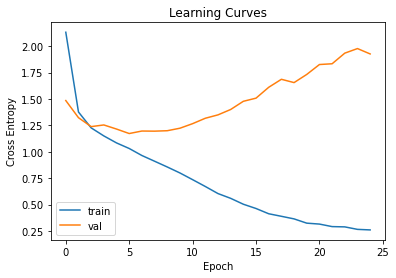

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
# Loading the previously saved model
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/SavedModels/FRAMES/intent")

In [ ]:
#Evaluate the model performance on test data
model_score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

42/42 [==============================] - 1s 13ms/step - loss: 1.3369 - accuracy: 0.6209


In [ ]:
import random
#Predict the intents
for i in random.sample(range(1, 430), 5):
    #print(i)
    prediction = (model.predict(np.expand_dims(X_test[i],axis=0)) > 0.5).astype("int32")
    print("Input Query  "+test_df["sentences"][i])
    print("Expected Intent:  "+test_df["intents"][i])
    print("Predicted Intent: "+label_encoder.inverse_transform([np.argmax(prediction, axis=None, out=None)]))
    print('*'*75)

Input Query  I also have a 10 day package at a 4.5 star if youd prefer that
Expected Intent:  provide_hotel
['Predicted Intent: provide_info']
***************************************************************************
Input Query  Yes book this for us please
Expected Intent:  book
['Predicted Intent: book']
***************************************************************************
Input Query  Well based on length of trip that one to SL sounds like a great deal
Expected Intent:  other
['Predicted Intent: other']
***************************************************************************
Input Query  My database did not provide me this information
Expected Intent:  availability_info
['Predicted Intent: amenity']
***************************************************************************
Input Query  Which one would you prefer
Expected Intent:  trip
['Predicted Intent: provide_hotel']
***************************************************************************


In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
y_test = [np.argmax(y, axis=None, out=None) for y in y_test]
predictions = [np.argmax(y, axis=None, out=None) for y in predictions]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

print('Confusion Matrix')
cm = confusion_matrix(y_test, predictions)
print(sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt="d"))
print(classification_report(y_test, predictions, digits=5))

# Slot Filling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
import numpy as np
train_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/DiscardAfterJune/uncleanedFRAMES/frames_train.pkl")
valid_df = pd.read_pickle("/content/drive/MyDrive/Datasets/WordLevelRepresentation/DiscardAfterJune/uncleanedFRAMES/frames_valid.pkl")
test_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/DiscardAfterJune/uncleanedFRAMES/frames_test.pkl')

In [26]:
import numpy as np

def applyall(i):
    return np.asarray(i)

X_train = train_df['intelligent_concatenated_representation']
X_train = X_train.values
X_train = applyall(X_train)
X_train = np.stack(X_train)
print(X_train.shape)

X_valid = valid_df['intelligent_concatenated_representation']
X_valid = X_valid.values
X_valid = applyall(X_valid)
X_valid = np.stack(X_valid)
print(X_valid.shape)

X_test = test_df['intelligent_concatenated_representation']
X_test = X_test.values
X_test = applyall(X_test)
X_test = np.stack(X_test)
print(X_test.shape)

(19155, 24, 484)
(2129, 24, 484)
(5321, 24, 484)


In [27]:
df = pd.concat([train_df,valid_df,test_df],axis = 0)

In [28]:
import numpy as np
slot_y_train = train_df['slots']
slot_y_valid = valid_df['slots']
slot_y_test = test_df['slots']

In [29]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(slot_y_train.shape)
print(slot_y_valid.shape)
print(slot_y_test.shape)

(19155, 24, 484)
(2129, 24, 484)
(5321, 24, 484)
(19155,)
(2129,)
(5321,)


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils

NUM_WORDS = 10000
OOV_TOKEN = "<UNK>"

In [31]:
y_tokenizer = Tokenizer(filters = '', lower = False, split = ' ')
y_tokenizer.fit_on_texts(list(df["slots"]))

#Convert text to sequences
y_train_seq = y_tokenizer.texts_to_sequences(list(slot_y_train))
y_valid_seq = y_tokenizer.texts_to_sequences(list(slot_y_valid))
y_test_seq = y_tokenizer.texts_to_sequences(list(slot_y_test))

In [ ]:
y_tokenizer.word_index.keys()

In [32]:
MAX_SEQ_LEN = 24
y_train_padded = pad_sequences(y_train_seq, maxlen = MAX_SEQ_LEN, padding = 'post')
y_valid_padded = pad_sequences(y_valid_seq, maxlen = MAX_SEQ_LEN, padding = 'post')
y_test_padded = pad_sequences(y_test_seq, maxlen = MAX_SEQ_LEN, padding = 'post')

In [33]:
#Convert labels to one-hot vectors
slot_y_train_encoded = utils.to_categorical(y_train_padded, num_classes = 135)
slot_y_valid_encoded = utils.to_categorical(y_valid_padded, num_classes = 135)
slot_y_test_encoded = utils.to_categorical(y_test_padded, num_classes = 135)
print(slot_y_train_encoded.shape, slot_y_valid_encoded.shape, slot_y_test_encoded.shape)

(19155, 24, 135) (2129, 24, 135) (5321, 24, 135)


In [ ]:
import wandb
run = wandb.init(reinit=True)
wandb.init(project="AutomaticInquirySystem", entity="fyp-ais-2022")

In [ ]:
from wandb.keras import WandbCallback

callback = WandbCallback(
    monitor="val_loss", verbose=1, mode="min", save_weights_only=(False),
    log_weights=(False), log_gradients=(False), save_model=(True),
    training_data=(X_train, y_train_encoded), validation_data=(X_valid, y_valid_encoded), labels=list(label_encoder.inverse_transform(range(16))), predictions=36,
    generator=None, input_type=None, output_type=None, log_evaluation=(False),
    validation_steps=None, class_colors=None, log_batch_frequency=None,
    log_best_prefix="best_", save_graph=(True), validation_indexes=None,
    validation_row_processor=None, prediction_row_processor=None,
    infer_missing_processors=(True), log_evaluation_frequency=0,
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, TimeDistributed, Input
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 128
EPOCHS = 25
EMBEDDING_DIM = 484
NUM_UNITS = 128
VOCAB_SIZE = NUM_WORDS
Y_VOCAB_SIZE = 135  #len(y_tokenizer.word_index) + 1


#Define a Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM)))

bilstm_model.add(Bidirectional(LSTM(NUM_UNITS,  return_sequences=True)))
bilstm_model.add(Bidirectional(LSTM(NUM_UNITS,  return_sequences=True)))
bilstm_model.add(Bidirectional(LSTM(NUM_UNITS, return_sequences=True)))

bilstm_model.add(TimeDistributed(Dense(Y_VOCAB_SIZE, activation='softmax'),name='Slot-Filling'))


#Compile the model
bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Precision(), Recall(), 'accuracy'])

bilstm_model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(bilstm_model, show_shapes=True)
#plot_model(bilstm_model)

In [35]:
#Fit the model on training data
bilstm_history = bilstm_model.fit(X_train, slot_y_train_encoded, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data=(X_valid, slot_y_valid_encoded), verbose=0)#,callbacks=[callback])

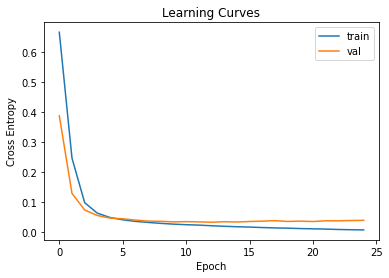

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(bilstm_history.history['loss'], label='train')
pyplot.plot(bilstm_history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
#Evaluate the model performance on test data
bilstm_score = bilstm_model.evaluate(X_test, slot_y_test_encoded, batch_size = BATCH_SIZE)

7/7 [==============================] - 0s 40ms/step - loss: 0.0697 - precision: 0.9903 - recall: 0.9855 - accuracy: 0.9876


In [37]:
bilstm_model.save('/content/drive/MyDrive/SavedModels/FRAMES/uncleanedSlots')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SavedModels/FRAMES/uncleanedSlots/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SavedModels/FRAMES/uncleanedSlots/assets


In [36]:
label_list = list(y_tokenizer.word_index.keys())
index_list = list(y_tokenizer.word_index.values())

import random
#Predict the slots
for i in random.sample(range(1, 893), 3):
    #print(i)
    prediction = bilstm_model.predict(np.expand_dims(X_test[i],axis=0))
    slots = [label_list[index_list.index(j)] for j in [np.argmax(x) for x in prediction[0][:]] if j in index_list]
    print("Input Query  "+test_df["sentences"][i])
    print()
    print("Expected Slots:  "+test_df["slots"][i])
    print()
    print("Predicted Slots: ",slots)
    print('*'*75)

Input Query  Neato Well if I had the time off available I would definitely book Curitiba

Expected Slots:  O O O O O O O O O O O O B-book B-city_name

Predicted Slots:  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-book', 'B-city_name']
***************************************************************************
Input Query  It is a 2.5 star hotel with a 0/10 guest rating

Expected Slots:  O O O B-hotel_rating I-hotel_rating B-hotel O O B-guest_rating I-guest_rating I-guest_rating

Predicted Slots:  ['O', 'O', 'O', 'B-hotel_rating', 'I-hotel_rating', 'B-hotel', 'O', 'O', 'B-guest_rating', 'I-guest_rating', 'I-guest_rating']
***************************************************************************
Input Query  We do not offer free trips

Expected Slots:  O O O O B-amenities_cost.relative O

Predicted Slots:  ['O', 'O', 'O', 'O', 'B-amenities_cost.relative', 'O']
***************************************************************************


# Intelligent Deep Concurrent Model

In [ ]:
!nvidia-smi

Sat Apr 30 17:04:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install keras-self-attention

In [3]:
import pandas as pd 
import numpy as np 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten, GlobalAveragePooling1D, Dropout, GRU, Input, TimeDistributed

import nltk
import re
from textblob import Word, TextBlob

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

import keras
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.metrics import Precision, Recall

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils

from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.merge import add

In [4]:
train_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_train.pkl')
valid_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_valid.pkl')
test_df = pd.read_pickle('/content/drive/MyDrive/Datasets/WordLevelRepresentation/FRAMES/frames_test.pkl')

In [5]:
def applyall(i):
    return np.asarray(i)

X_train = train_df['intelligent_concatenated_representation']
X_train = X_train.values
X_train = applyall(X_train)
X_train = np.stack(X_train)
print(X_train.shape)

X_valid = valid_df['intelligent_concatenated_representation']
X_valid = X_valid.values
X_valid = applyall(X_valid)
X_valid = np.stack(X_valid)
print(X_valid.shape)

X_test = test_df['intelligent_concatenated_representation']
X_test = X_test.values
X_test = applyall(X_test)
X_test = np.stack(X_test)
print(X_test.shape)

(18679, 24, 484)
(2071, 24, 484)
(5186, 24, 484)


In [6]:
df = pd.concat([train_df,valid_df,test_df],axis = 0)

In [9]:
DISTINCT_SLOT   = 135
DISTINCT_INTENT = 23
DISTINCT_DA     =  10

MAX_SEQ_LEN = X_train[0].shape[0]   # 24
EMBEDDING_DIM = X_train[0].shape[1] # 484

## Intent Detection

In [10]:
intent_label_encoder = preprocessing.LabelEncoder()
df = pd.concat([train_df,valid_df,test_df],axis = 0)
intent_label_encoder.fit(df["intents"])

train_df['label_encoded_intents'] = intent_label_encoder.transform(train_df['intents'])
valid_df['label_encoded_intents'] = intent_label_encoder.transform(valid_df['intents'])
test_df['label_encoded_intents'] = intent_label_encoder.transform(test_df['intents'])

dataset_train_classes = train_df['label_encoded_intents'].values
dataset_train_class_list = [x for x in dataset_train_classes]

dataset_valid_classes = valid_df['label_encoded_intents'].values
dataset_valid_class_list = [x for x in dataset_valid_classes]

dataset_test_classes = test_df['label_encoded_intents'].values
dataset_test_class_list = [x for x in dataset_test_classes]

In [11]:
dataset_train_classes = to_categorical(dataset_train_class_list, num_classes = DISTINCT_INTENT)
dataset_valid_classes = to_categorical(dataset_valid_class_list, num_classes = DISTINCT_INTENT)
dataset_test_classes = to_categorical(dataset_test_class_list, num_classes = DISTINCT_INTENT) 

intent_y_train = dataset_train_classes
intent_y_valid = dataset_valid_classes
intent_y_test = dataset_test_classes

## Dialogue Act Classification

In [12]:
dac_label_encoder = preprocessing.LabelEncoder()
df = pd.concat([train_df,valid_df,test_df],axis = 0)
dac_label_encoder.fit(df["dac"])
train_df['label_encoded_dac'] = dac_label_encoder.transform(train_df['dac'])
valid_df['label_encoded_dac'] = dac_label_encoder.transform(valid_df['dac'])
test_df['label_encoded_dac'] = dac_label_encoder.transform(test_df['dac'])

dataset_train_classes = train_df['label_encoded_dac'].values
dataset_train_class_list = [x for x in dataset_train_classes]

dataset_valid_classes = valid_df['label_encoded_dac'].values
dataset_valid_class_list = [x for x in dataset_valid_classes]

dataset_test_classes = test_df['label_encoded_dac'].values
dataset_test_class_list = [x for x in dataset_test_classes]

dataset_train_classes = to_categorical(dataset_train_class_list, num_classes = DISTINCT_DA)
dataset_valid_classes = to_categorical(dataset_valid_class_list, num_classes = DISTINCT_DA)
dataset_test_classes = to_categorical(dataset_test_class_list, num_classes = DISTINCT_DA)

In [13]:
dac_y_train = dataset_train_classes
dac_y_valid = dataset_valid_classes
dac_y_test = dataset_test_classes

## Slot Filling

In [14]:
import numpy as np
slot_y_train = train_df['slots']
slot_y_valid = valid_df['slots']
slot_y_test = test_df['slots']

In [15]:
y_tokenizer = Tokenizer(filters = '', lower = False, split = ' ')
y_tokenizer.fit_on_texts(list(df["slots"]))

#Convert text to sequences
y_train_seq = y_tokenizer.texts_to_sequences(list(slot_y_train))
y_valid_seq = y_tokenizer.texts_to_sequences(list(slot_y_valid))
y_test_seq = y_tokenizer.texts_to_sequences(list(slot_y_test))

In [16]:
y_train_padded = pad_sequences(y_train_seq, maxlen = MAX_SEQ_LEN, padding = 'post')
y_valid_padded = pad_sequences(y_valid_seq, maxlen = MAX_SEQ_LEN, padding = 'post')
y_test_padded = pad_sequences(y_test_seq, maxlen = MAX_SEQ_LEN, padding = 'post')

#Convert labels to one-hot vectors
slot_y_train_encoded = utils.to_categorical(y_train_padded, num_classes = DISTINCT_SLOT)
slot_y_valid_encoded = utils.to_categorical(y_valid_padded, num_classes = DISTINCT_SLOT)
slot_y_test_encoded = utils.to_categorical(y_test_padded, num_classes = DISTINCT_SLOT)
print(slot_y_train_encoded.shape, slot_y_valid_encoded.shape, slot_y_test_encoded.shape)

(18679, 24, 135) (2071, 24, 135) (5186, 24, 135)


# Multi Task Model Defining

In [17]:
BATCH_SIZE = 128
EPOCHS = 50
NUM_UNITS = 100
ATTENTION_WIDTH = 15

### Non-Residual

In [ ]:
model_input = Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM), dtype='float64')
x = Bidirectional(GRU( NUM_UNITS, return_sequences=True))(model_input)
x = Bidirectional(GRU( NUM_UNITS, return_sequences=True))(x)
x = Bidirectional(GRU( NUM_UNITS, return_sequences=True))(x)


x1 = SeqSelfAttention(
    attention_width=ATTENTION_WIDTH,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-6),
    use_attention_bias=False,
    attention_regularizer_weight=1e-4,
    name='Attention_dac',
)(x)
x1 = Flatten()(x1)

x2 = SeqSelfAttention(
    attention_width=ATTENTION_WIDTH,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-5),
    use_attention_bias=False,
    attention_regularizer_weight=1e-4,
    name='Attention_intent',
)(x)
x2 = Flatten()(x2)

y1=Dense(DISTINCT_DA,activation='softmax', name='Dialogue-Act-Classification')(x1)
y2=Dense(DISTINCT_INTENT,activation='softmax',name='Intent-Detection')(x2)
y3 = TimeDistributed(Dense(DISTINCT_SLOT, activation='softmax'), name = 'Slot-Filling')(x)

model=Model(inputs=model_input,outputs=[y1,y2,y3])

model.compile(loss='categorical_crossentropy',loss_weights = [10,50,1],
                  optimizer='adam',
                  metrics=['accuracy', Precision(), Recall()])

### Residual

In [ ]:
model_input = Input(shape=(MAX_SEQ_LEN,EMBEDDING_DIM), dtype='float64')
layer_1 = Bidirectional(LSTM( NUM_UNITS, return_sequences=True))(model_input)
#layer_1 = Dropout(0.5)(layer_1)
layer_2 = Bidirectional(LSTM( NUM_UNITS, return_sequences=True))(layer_1)
#layer_2 = Dropout(0.5)(layer_2)
add_1 = add([layer_1,layer_2])
layer_3 = Bidirectional(LSTM( NUM_UNITS, return_sequences=True))(add_1)
#layer_3 = Dropout(0.5)(layer_3)
add_2 = add([add_1,layer_3])

x1 = SeqSelfAttention(
    attention_width=ATTENTION_WIDTH,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-6),
    use_attention_bias=False,
    attention_regularizer_weight=1e-4,
    name='Attention_dac',
)(add_2)
x1 = Flatten()(x1)

x2 = SeqSelfAttention(
    attention_width=ATTENTION_WIDTH,
    attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
    attention_activation=None,
    kernel_regularizer=keras.regularizers.l2(1e-5),
    use_attention_bias=False,
    attention_regularizer_weight=1e-4,
    name='Attention_intent',
)(add_2)
x2 = Flatten()(x2)

y1=Dense(DISTINCT_DA,activation='softmax', name='Dialogue-Act-Classification')(x1)
y2=Dense(DISTINCT_INTENT,activation='softmax',name='Intent-Detection')(x2)
y3 = TimeDistributed(Dense(DISTINCT_SLOT, activation='softmax'), name = 'Slot-Filling')(add_2)

model=Model(inputs=model_input,outputs=[y1,y2,y3])

model.compile(loss='categorical_crossentropy',loss_weights = [10,50,1],
                  optimizer='adam',
                  metrics=['accuracy', Precision(), Recall()])

###Training

In [ ]:
plot_model(model)

In [ ]:
model.summary()

In [ ]:
ep = EarlyStopping(
    monitor='val_loss', 
    patience=5,
)
filepath = 'my_checkpoint.ckpt'
cp = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("multitask_frames_model_history_log.csv", append=True)

In [ ]:
!pip install wandb

In [ ]:
import wandb

In [ ]:
wandb.login()

wandb: Currently logged in as: fyp-ais-2022 (use `wandb login --relogin` to force relogin)


True

In [ ]:
wandb.init(project="fyp")

In [ ]:
from wandb.keras import WandbCallback

callback = WandbCallback(
    monitor="val_loss", verbose=1, mode="min", save_weights_only=(False),
    log_weights=(False), log_gradients=(False), save_model=(True),
    training_data=(X_train, y_train), validation_data=(X_valid, y_valid), labels=list(label_encoder.inverse_transform(range(3))), predictions=36,
    generator=None, input_type=None, output_type=None, log_evaluation=(False),
    validation_steps=None, class_colors=None, log_batch_frequency=None,
    log_best_prefix="best_", save_graph=(True), validation_indexes=None,
    validation_row_processor=None, prediction_row_processor=None,
    infer_missing_processors=(True), log_evaluation_frequency=0,
)

In [ ]:
history = model.fit(X_train, [dac_y_train,intent_y_train,slot_y_train_encoded],
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        verbose=1,validation_data=(X_valid, [dac_y_valid,intent_y_valid, slot_y_valid_encoded]),callbacks=[callback])
                        #validation_data=(X_valid, [y_valid, dac_y_valid]))

Epoch 1/50
146/146 [==============================] - ETA: 0s - loss: 95.4847 - Dialogue-Act-Classification_loss: 1.6567 - Intent-Detection_loss: 1.5447 - Slot-Filling_loss: 1.6660 - Dialogue-Act-Classification_accuracy: 0.4588 - Dialogue-Act-Classification_precision_9: 0.5196 - Dialogue-Act-Classification_recall_9: 0.2106 - Intent-Detection_accuracy: 0.5111 - Intent-Detection_precision_9: 0.6988 - Intent-Detection_recall_9: 0.3292 - Slot-Filling_accuracy: 0.8231 - Slot-Filling_precision_9: 0.9960 - Slot-Filling_recall_9: 0.4203
Epoch 1: val_loss improved from inf to 78.51943, saving model to my_checkpoint.ckpt
146/146 [==============================] - 32s 126ms/step - loss: 95.4847 - Dialogue-Act-Classification_loss: 1.6567 - Intent-Detection_loss: 1.5447 - Slot-Filling_loss: 1.6660 - Dialogue-Act-Classification_accuracy: 0.4588 - Dialogue-Act-Classification_precision_9: 0.5196 - Dialogue-Act-Classification_recall_9: 0.2106 - Intent-Detection_accuracy: 0.5111 - Intent-Detection_preci

In [ ]:
score = model.evaluate(X_test, [dac_y_test,intent_y_test,slot_y_test_encoded], batch_size=256, verbose=1)

21/21 [==============================] - 1s 60ms/step - loss: 78.7079 - Dialogue-Act-Classification_loss: 1.5950 - Intent-Detection_loss: 1.2512 - Slot-Filling_loss: 0.1760 - Dialogue-Act-Classification_accuracy: 0.4659 - Dialogue-Act-Classification_precision_9: 0.5301 - Dialogue-Act-Classification_recall_9: 0.3415 - Intent-Detection_accuracy: 0.6292 - Intent-Detection_precision_9: 0.6686 - Intent-Detection_recall_9: 0.5908 - Slot-Filling_accuracy: 0.9637 - Slot-Filling_precision_9: 0.9785 - Slot-Filling_recall_9: 0.9430


In [ ]:
model.load_weights('/content/my_checkpoint.ckpt')

In [ ]:
model.save('/content/drive/MyDrive/frames_cleaned_1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/frames_cleaned_6/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/frames_cleaned_6/assets


###Prediction

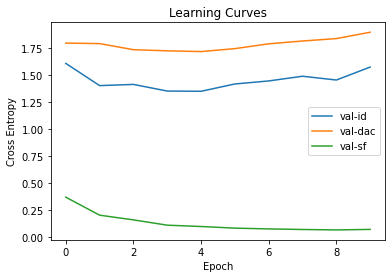

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
#pyplot.plot(history.history['Dialogue-Act-Classification_loss'], label='train-dac')
pyplot.plot(history.history['val_Intent-Detection_loss'], label='val-id')
pyplot.plot(history.history['val_Dialogue-Act-Classification_loss'], label='val-dac')
pyplot.plot(history.history['val_Slot-Filling_loss'], label='val-sf')
pyplot.legend()
pyplot.show()

In [ ]:
label_list = list(y_tokenizer.word_index.keys())
index_list = list(y_tokenizer.word_index.values())

import random
#Predict the slots
for i in random.sample(range(1, 893), 7):
    print(i)
    print(test_df["sentences"][i])
    prediction = model.predict(np.expand_dims(X_test[i],axis=0))
    dac_prediction = (prediction[0] > 0.5).astype("int32")
    print("Expected Dialogue Act : ",test_df["dac"][i])
    print("Predicted Dialogue Act : ",dac_label_encoder.inverse_transform([np.argmax(dac_prediction, axis=None, out=None)]))
    
    intent_prediction = (prediction[1] > 0.5).astype("int32")
    print("Expected Intent : ",test_df["intents"][i])
    print("Predicted Intent : ",intent_label_encoder.inverse_transform([np.argmax(intent_prediction, axis=None, out=None)]))
    
    slots = [label_list[index_list.index(j)] for j in [np.argmax(x) for x in prediction[2][0][:]] if j in index_list]
    print("Expected Slots : ",test_df["slots"][i])
    print("Predicted Slots : ",slots)
    print('*'*75)

249
try Leon
Expected Dialogue Act :  request
Predicted Dialogue Act :  ['affirm']
Expected Intent :  other
Predicted Intent :  ['other']
Expected Slots :  O B-to_loc.city_name
Predicted Slots :  ['O', 'B-city_name']
***************************************************************************
377
I would be happy to help you with that
Expected Dialogue Act :  inform
Predicted Dialogue Act :  ['affirm']
Expected Intent :  other
Predicted Intent :  ['trip']
Expected Slots :  O O O O O O O O O
Predicted Slots :  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
***************************************************************************
753
Is there a trip to Punta Cana after the 7th that is within my budget that is shorter than 8 days
Expected Dialogue Act :  request
Predicted Dialogue Act :  ['inform']
Expected Intent :  budget_info
Predicted Intent :  ['provide_trip']
Expected Slots :  O O O O O B-to_loc.city_name I-to_loc.city_name B-time_relative O B-day_number O O O O O O O B-trip_duratio

In [25]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/frames_cleaned_1')

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [30]:
label_list = list(y_tokenizer.word_index.keys())
index_list = list(y_tokenizer.word_index.values())

import random
#Predict the slots
i = int(input("Enter an index: "))   
print(test_df["sentences"][i])
prediction = model.predict(np.expand_dims(X_test[i],axis=0))
dac_prediction = (prediction[0] > 0.5).astype("int32")
print("Expected Dialogue Act : ",test_df["dac"][i])
print("Predicted Dialogue Act : ",dac_label_encoder.inverse_transform([np.argmax(dac_prediction, axis=None, out=None)]))

intent_prediction = (prediction[1] > 0.5).astype("int32")
print("Expected Intent : ",test_df["intents"][i])
print("Predicted Intent : ",intent_label_encoder.inverse_transform([np.argmax(intent_prediction, axis=None, out=None)]))

slots = [label_list[index_list.index(j)] for j in [np.argmax(x) for x in prediction[2][0][:]] if j in index_list]
print("Expected Slots : ",test_df["slots"][i])
print("Predicted Slots : ",slots)
print('*'*75)

Enter an index: 36
It is a 4 star hotel with a 0/10 guest rating free wifi and free parking
Expected Dialogue Act :  inform
Predicted Dialogue Act :  ['inform']
Expected Intent :  provide_hotel
Predicted Intent :  ['provide_hotel']
Expected Slots :  O O O B-hotel_rating I-hotel_rating B-hotel O O B-guest_rating I-guest_rating I-guest_rating B-amenities_cost.relative B-amenities_type O B-amenities_cost.relative B-amenities_type
Predicted Slots :  ['O', 'O', 'O', 'B-hotel_rating', 'I-hotel_rating', 'B-hotel', 'O', 'O', 'O', 'O', 'O', 'B-amenities_cost.relative', 'B-amenities_type', 'O', 'B-amenities_cost.relative', 'B-amenities_type']
***************************************************************************
